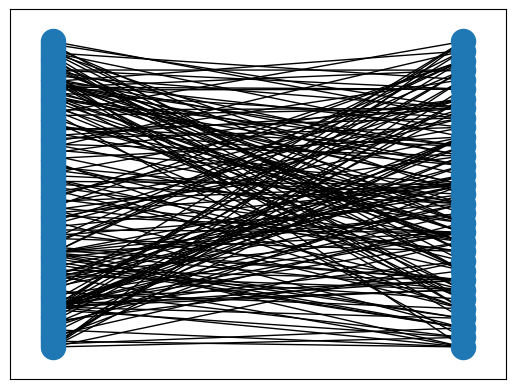

In [ ]:
from src import nx_hif

import networkx as nx

G_hif = nx_hif.read_hif("data/publications.hif.json")
largest_cc = max(nx.connected_components(G_hif), key=len)
G_hif_2 = G_hif.subgraph(largest_cc)
pos = nx.bipartite_layout(G_hif_2, {n for n, d in G_hif_2.nodes(data=True) if d["bipartite"] == 0})
nx.draw_networkx(G_hif_2, pos=pos, with_labels=False)